# import von Paketen


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import skimage.measure as sm
from tqdm import tqdm_notebook as tqdm
import scipy.optimize as opt

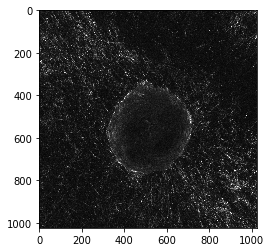

In [2]:
# laden des Bilds
im = cv2.imread("Pos002_S001_t314_z6_ch00.tif")
im.shape
plt.imshow(im)
plt.show()

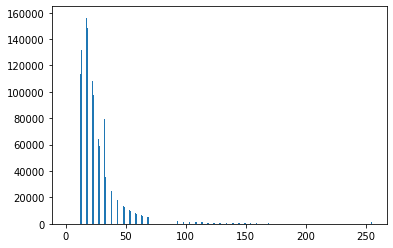

In [3]:
im_flat=np.array(im).flatten()
# statistik des Bildes
n, bins, _  = plt.hist(im_flat,bins='auto')
plt.show()

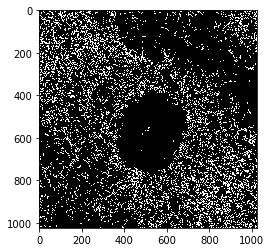

In [4]:
# Kantendetektion
minVal = 50
maxVal = 200

edges = cv2.Canny(im,minVal,maxVal)
plt.imshow(edges,cmap='gray')
plt.show()

In [5]:
# Selektion der einzelnen Kanten
labels = sm.label(edges)
print(np.amax(labels) , "zusammenhängende Kanten gefunden")

4095 zusammenhängende Kanten gefunden


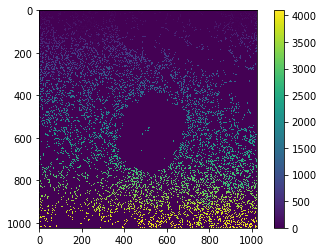

In [6]:
plt.imshow(labels)
plt.colorbar()
plt.show()

C:\Users\david\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\Users\david\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


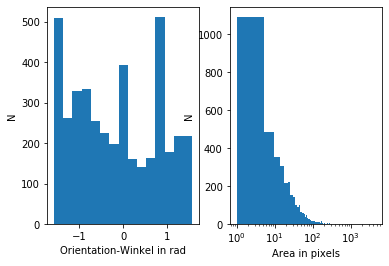

In [7]:
# die Kanten untersuchen
regions = sm.regionprops(labels)
angles_rad= np.array([]) 
sizes = np.array([])
for region in regions:
    angles_rad= np.append(angles_rad,region.orientation)
    sizes= np.append(sizes,region.area)
plt.subplot(121)
n, bins, _ = plt.hist(angles_rad,bins='auto')
plt.xlabel("Orientation-Winkel in rad")
plt.ylabel("N")
plt.subplot(122)
n, bins, _ = plt.hist(sizes,bins='auto')
plt.ylabel("N")
plt.xlabel("Area in pixels")
plt.xscale("log")
plt.show()

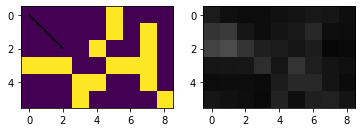

In [8]:
# eine Random Kante heraussuchen und anschauen, testweise
random_index = np.random.randint(0,len(regions))
plt.subplot(121)
plt.imshow(regions[random_index].image)
my_box = regions[random_index].bbox
plt.arrow(0,0,2,2*np.cos(regions[random_index].orientation))
plt.subplot(122)
plt.imshow(im[my_box[0]:my_box[2],my_box[1]:my_box[3]])
plt.show()

In [9]:
# Fit von linear modell an die kanten für größer schwellwert

In [10]:
def linear_model(x,m,t):
    return(m*x + t)

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


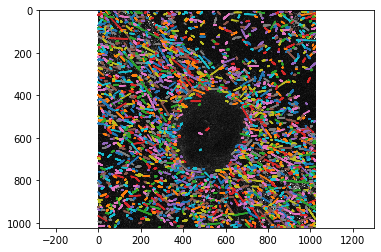

In [11]:
area_threshold = 10 # auch 5 möglich
all_lines=[]

for region in tqdm(regions):
    if region.area > area_threshold:
        p_opt,p_cov = opt.curve_fit(linear_model,region.coords[:,1],region.coords[:,0],p0= [0,0])
        plt.plot(region.coords[:,1],linear_model(region.coords[:,1],p_opt[0],p_opt[1]))
        all_lines.append(np.array([region.coords[:,1],linear_model(region.coords[:,1],p_opt[0],p_opt[1])]))
plt.axis("equal")
plt.imshow(im)
plt.show()
            


# Zusammenfassung

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


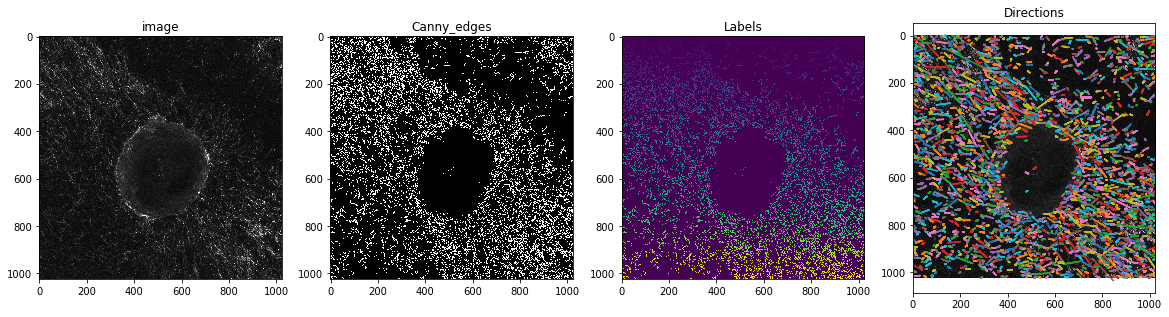

In [12]:
# Zusammenfassung:
size=5
plt.figure(figsize=[4*size,size])
plt.subplot(141)
plt.title("image")
plt.imshow(im)
plt.subplot(142)
plt.title("Canny_edges")
plt.imshow(edges,cmap='gray')
plt.subplot(143)
plt.title("Labels")
plt.imshow(labels)
plt.subplot(144)
plt.title("Directions")
plt.imshow(im)
for lines in tqdm(all_lines):
    plt.plot(lines[0],lines[1])
plt.show()

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


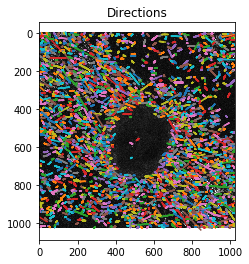

In [17]:
plt.title("Directions")
plt.imshow(im)
for lines in tqdm(all_lines):
    plt.plot(lines[0],lines[1])
#plt.show()

plt.savefig('test.png',dpi=300)